# Customer Segmentation Analysis Using Clustering

## Introduction
In today's competitive market, understanding customer behavior and preferences is crucial for businesses to tailor their marketing strategies effectively. This project leverages clustering techniques to segment customers based on various attributes such as demographics, purchasing behavior, and response to marketing campaigns. By identifying distinct customer segments, businesses can develop targeted marketing strategies that resonate with each group's unique characteristics and needs.
This notebook provides a comprehensive analysis of customer data using clustering algorithms, followed by actionable insights and marketing strategies tailored for each identified segment.

In [169]:
# import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE

In [131]:
#load data
df = pd.read_csv('customer_segmentation.csv')

In [132]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [133]:
df.shape

(2240, 29)

- we have 2240 customers in our data 

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [135]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


- Most custommers are aged 55 years, the younger one is aged 28.
- maximum income is 666666 and the minimum is 1730 and on the average customers earn 52247.25

In [136]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,336.597393,39.773434,225.715373,54.628979,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,173.500000,8.000000,67.000000,12.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,504.250000,33.000000,232.000000,50.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1493.000000,199.000000,1725.000000,259.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


- Wines are the most purchased products then meat is on the second rank, fish on the third rank, gold on the fourth rank and finally fruits.
- The number of store purchases are higher than web purchases and catalog purchases.
- The average number of websites visited by customers is 5 and the maximum is 20.

In [137]:
df.duplicated().sum()

0

In [138]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- We have 24 Income values null so we have to impute it also we have to encode the categorical columns so we can apply clustering

In [139]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

- `Education, Marital_Status` are categorical features we have to encode them.
- `Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntGoldProds, NumDealsPurchases,
NumWebPurchases, NumCatalogPurchases, NumStorePurchases,NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2      , Complain, Z_CostContact, Z_Revenue, Response` are numerical features we have to scale them.               int64

In [140]:
# create new feature 'Total_spent' the sum of these features ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds')
df['Total_spent'] = df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntGoldProds']
# create new feature 'Number_of_purchases' the sum of these features ('NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases')
df['Number_of_purchases'] = df['NumDealsPurchases']+ df['NumWebPurchases']+ df['NumCatalogPurchases']+ df['NumStorePurchases']

In [141]:
cat_features = ['Education', 'Marital_Status']
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
# impute missing values in income with mean and scale all numerical values
num_trans = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)
# encode categorical columns
cat_trans = Pipeline(
    steps=[
        ('onehot', OneHotEncoder())
    ]
)
# combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_features),
        ('cat', cat_trans, cat_features)
    ]
)
# fit and transform the data
prep = preprocessor.fit_transform(df)
# get categorical features names
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feat_names = onehot_encoder.get_feature_names_out(cat_features).tolist()
# combine categorical and numerical features
features_names = num_features + cat_feat_names
# convert to dataframe
df_prep = pd.DataFrame(prep, columns=features_names)
# display one row after preprocessing the data
print(df_prep.head(1))

         ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.020999   -0.985345  0.235327 -0.825218 -0.929894  0.307039  0.983781   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Education_Master  \
0   1.551577         1.679702         2.462147  ...               0.0   

   Education_PhD  Marital_Status_Absurd  Marital_Status_Alone  \
0            0.0                    0.0                   0.0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                      0.0                     0.0                    1.0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                      0.0                   0.0                  0.0  

[1 rows x 41 columns]


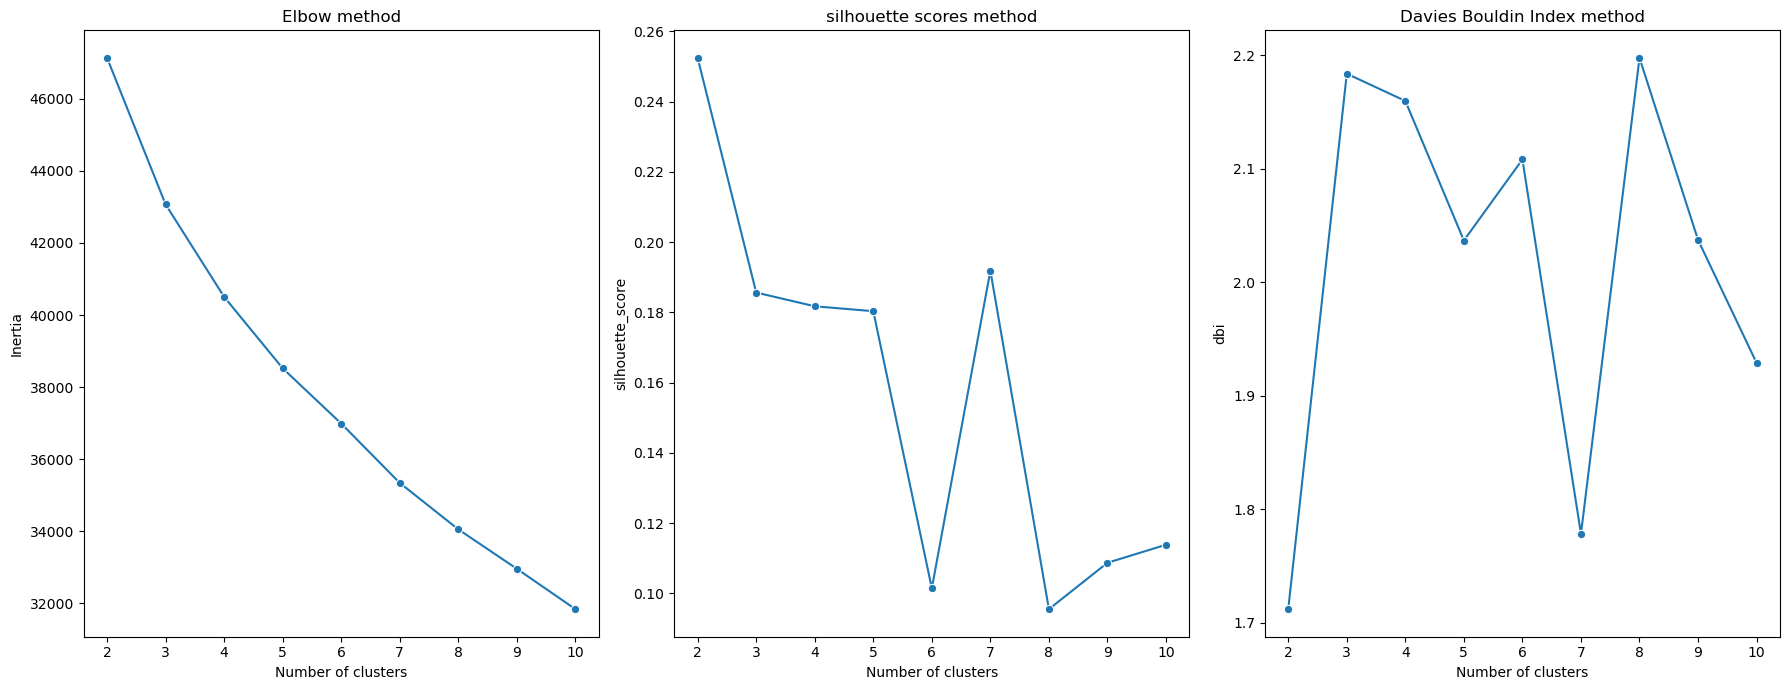

In [142]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
dbi = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_prep)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_prep, kmeans.labels_))
    dbi.append(davies_bouldin_score(df_prep, kmeans.labels_))
# first plot:elbow method
plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1)
sns.lineplot(x=range(2, 11), y=inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# second plot: silhouette score
plt.subplot(1, 3, 2)
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o')
plt.title('silhouette scores method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
# third plot: davies bouldin index
plt.subplot(1, 3, 3)
sns.lineplot(x=range(2, 11), y=dbi, marker='o')
plt.title('Davies Bouldin Index method')
plt.xlabel('Number of clusters')
plt.ylabel('dbi')
plt.tight_layout()
plt.show()


- from the plots **2** is the optimal number of clusters.

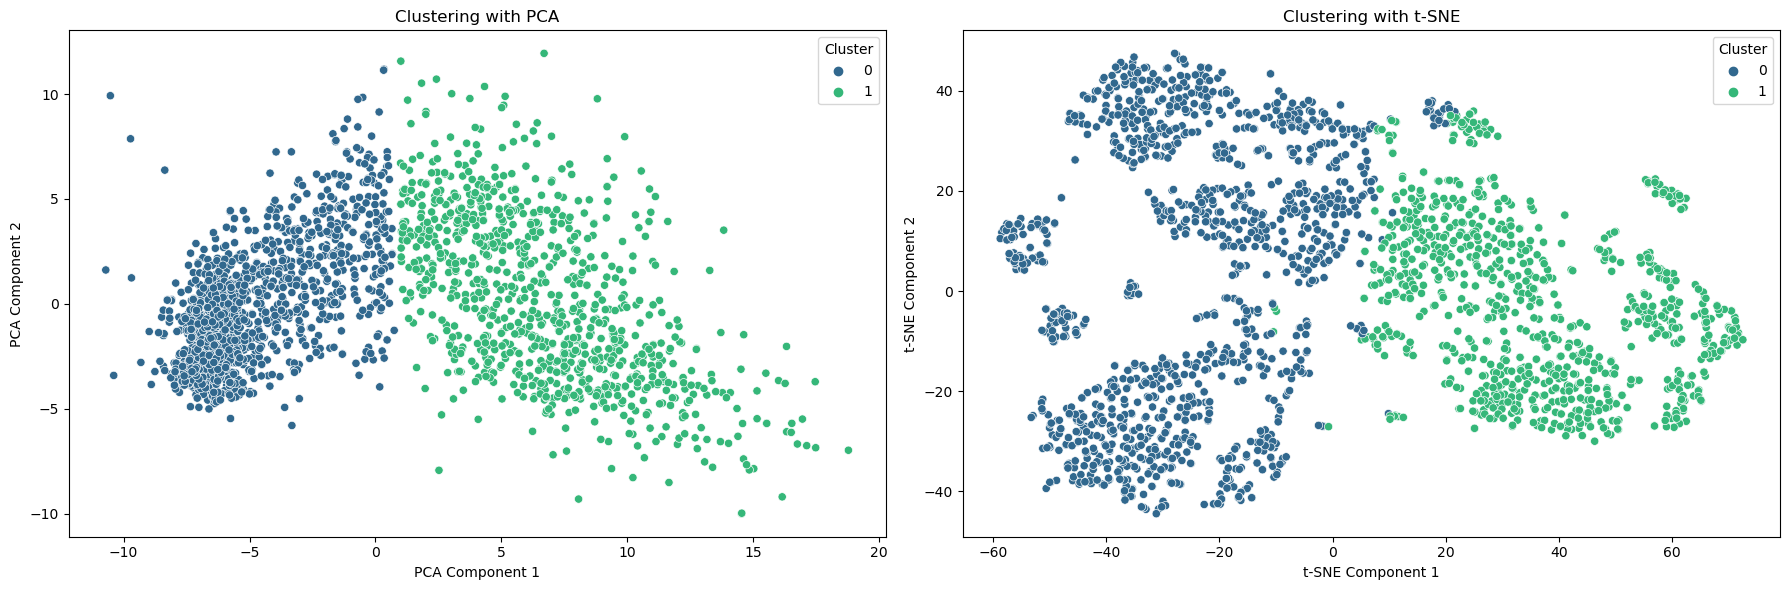

Silhouette Score for PCA:  0.5534365060601057
Silhouette Score for t-SNE:  0.44888455


In [170]:
# apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_prep)
# apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_prep)
# perform clustering on the original data
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_prep)

# add clustering results to the PCA and t-SNE data
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

df_tsne = pd.DataFrame(df_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = clusters

plt.figure(figsize=(18, 6))
# PCA plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', legend='full')
plt.title('Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# t-SNE plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', legend='full')
plt.title('Clustering with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()

# Calculate silhouette scores
silhouette_pca = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['Cluster'])
silhouette_tsne = silhouette_score(df_tsne[['TSNE1', 'TSNE2']], df_tsne['Cluster'])
print('Silhouette Score for PCA: ', silhouette_pca)
print('Silhouette Score for t-SNE: ', silhouette_tsne)

In [165]:
# clustering algorithm using kmeans since it has the best Silhouette Score
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_prep)
df_prep['PCA1']=df_pca[:, 0]
df_prep['PCA2']=df_pca[:, 1]
kmeans = KMeans(n_clusters=2, random_state=42)
df_prep['Cluster']= kmeans.fit_predict(df_pca)

In [166]:
# Evaluate the model
#silhouette score
silhouette_score = silhouette_score(df_prep, df_prep['Cluster'])
print(f"Silhouette Score: {silhouette_score}")
# davies bouldin index
dbi_score = davies_bouldin_score(df_prep, df_prep['Cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

Silhouette Score: 0.41889812302586404
Davies-Bouldin Index: 1.0002176201083952


In [181]:
# Analyze the cluster profiles
cluster_profiles = df_prep.groupby('Cluster').mean()
print('Cluster 0: ')
print(cluster_profiles.iloc[0])
print()
print('Cluster 1:')
print(cluster_profiles.iloc[1])

Cluster 0: 
ID                         0.009369
Year_Birth                 0.118175
Income                    -0.552457
Kidhome                    0.486238
Teenhome                   0.068413
Recency                   -0.003937
MntWines                  -0.643231
MntFruits                 -0.495112
MntMeatProducts           -0.584215
MntFishProducts           -0.510740
MntSweetProducts          -0.500822
MntGoldProds              -0.435782
NumDealsPurchases          0.059705
NumWebPurchases           -0.455611
NumCatalogPurchases       -0.626671
NumStorePurchases         -0.612129
NumWebVisitsMonth          0.442913
AcceptedCmp3              -0.025266
AcceptedCmp4              -0.190046
AcceptedCmp5              -0.280140
AcceptedCmp1              -0.246417
AcceptedCmp2              -0.103116
Complain                   0.014554
Z_CostContact              0.000000
Z_Revenue                  0.000000
Response                  -0.163585
Total_spent               -0.724031
Number_of_purcha

## General Insights:
- The data has been clustered into four groups (`labeled 0 and 1`).
- Each cluster represents a segment of the population with unique characteristics in terms of demographic, economic, and behavioral attributes.

- **Cluster 0**:
    - lower income compared to cluster 1.
    - older average age.
    - higher presence of kids at home.
    - higher education levels are less than in cluster 1.
    - lower overall spending on products.
    - fewer purchases through catalog, web and store.
    - higher number of web visits per month, indicating a potential interest in online browsing without purchasing.
    - lower acceptance rates for marketing campaigns.
    - lower overall response to marketing efforts.
- **Cluster 1**:
    - higher income compared to cluster 0.
    - younger average age.
    - fewer kids at home.
    - higher education levels with a notable percenatge of having master's degree and phd.
    - higher overall spending on products.
    - more purchases through catalog, web and store.
    - fewer web visits per month.
    - higher acceptance rates for marketing campaigns.
    - higher overall response to marketing efforts.
## Implications for Marketing:
- **Cluster 0**:
    - offer discounts on essential items.
    - introduce family oriented products that offer better value for money.
    - improve online shopping experince with features like wishlist reminder to convert web visits into purchases.
- **Cluster 1**:
    - promote premimum and luxury products.
    - implement a robust loyalty program taht rewards frequent purchases and higher spending.
    - offer fast shipping options and easy returns to enhance their shopping experince.